# Modelos de predicción


In [66]:
# importando librerias

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble

In [136]:
df = pd.read_csv('datasets/BlackFriday.csv', sep=',')

In [137]:
# eliminar columnas innecesarias

df.drop('Product_Category_2', axis=1, inplace=True)
df.drop('Product_Category_3', axis=1, inplace=True)

In [138]:
from sklearn.model_selection import train_test_split

# dividir dataset para entrenamiento y pruebas
df_train, df_test = train_test_split(df)

In [139]:
df_train.to_csv("datasets/train.csv", index=False)
df_test.to_csv("datasets/test.csv", index=False)

In [144]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(537577, 10)
(403182, 10)
(134395, 10)


In [145]:
# columnas categorias
categorical_columns = ["Product_ID", "Gender", "Age", "City_Category", "Stay_In_Current_City_Years"]


In [146]:
# seleccionando el target y separando los datos

train_y = np.array(df_train["Purchase"])
test_y = np.array(df_test["Purchase"])

train_X = df_train.copy()
test_X = df_test.copy()

train_X.drop('Purchase', axis=1, inplace=True)
test_X.drop('Purchase', axis=1, inplace=True)

In [160]:
# Normalizando los datos
# en lugar de usar la funcion apply como vimos antes, vamos a encodificar las variables categoricas

for var in categorical_columns:
    lb = LabelEncoder()
    full_var_data = pd.concat((train_X[var], test_X[var]), axis=0).astype('str')
    lb.fit( full_var_data )
    train_X[var] = lb.transform(train_X[var].astype('str'))
    test_X[var] = lb.transform(test_X[var].astype('str'))

In [161]:
train_X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
28847,1004390,1772,1,2,0,1,2,0,1
461274,1005015,2619,1,3,6,1,2,1,5
299414,1004081,928,1,1,12,2,2,0,8
163014,1001194,2441,0,2,1,1,1,1,16
263289,1004506,1790,1,5,16,1,2,0,8


In [162]:
train_y

array([11777,  8606,  7864, ...,  5822,  8891,  8591], dtype=int64)

In [167]:
print("Train shape is : ", train_X.shape)
print("Test shape is : ", test_X.shape)

Train shape is :  (403182, 9)
Test shape is :  (134395, 9)


In [168]:
params = {}
params["objective"] = "reg:linear"
params["eta"] = 0.05
params["seed"] = 0
params["max_depth"] = 3
plst = list(params.items())

In [169]:
xgtrain = xgb.DMatrix(train_X, label=train_y)
xgtest = xgb.DMatrix(test_X)


In [170]:
num_rounds = 100 # 5667
model = xgb.train(plst, xgtrain, num_rounds)
pred_test_y_xgb1 = model.predict(xgtest)


columns_out = ['User_ID','Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 
               'Stay_In_Current_City_Years','Marital_Status', 'Product_Category_1','Purchase']

test_X['Purchase'] = pred_test_y_xgb1
test_X.to_csv('datasets/Solution.csv',columns = columns_out, index = False)

[01:36:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[01:36:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:36:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

Ya con nuestros datos de predicción podemos volver a realizar las mismas graficas que en el notebook 2.Analisis_previo y hacer una modificación del precio proporsional con el valor de la TRM predicha.

In [171]:
# guardar codificacion de datos de entrenamiento
train_X['Purchase'] = train_y
train_X.to_csv('datasets/train_encode.csv')

# Respondiendo preguntas

Vamos a contestar las preguntas del ejercicio de forma grafica o tabular, según sea el caso.

Recordemos el valor de la TRM:
- 24-nov-2017 : 2982 pesos
- 23-nov-2018 : 2859 (Valor predicho) pesos


In [172]:
unique_users = len(test_X.User_ID.unique())
unique_products = len(test_X.Product_ID.unique())
print('There are {} unique users and {} unique products'.format(unique_users, unique_products))

There are 5860 unique users and 3392 unique products


In [173]:
import matplotlib.pyplot as plt

%matplotlib inline

## pregunta 1:

Unidades que se venderán por producto

In [241]:
df_one = test_X.filter(['Product_ID', 'User_ID'], axis=1)
df_prod = df_one.groupby(['Product_ID']).agg(['count'])
df_prod

,User_ID
,count
Product_ID,
0,285
1,83
2,51
3,18
4,39
5,141
6,63
7,8


## Pregunta 2:

Total de ventas (valor de ventas) por producto en pesos.

In [244]:
df_two = test_X.filter(['Product_ID', 'Purchase'], axis=1)
df_prod = df_two.groupby(['Product_ID']).agg(['sum'])
df_prod

,Purchase
,sum
Product_ID,
0,2.854189e+06
1,9.172094e+05
2,3.237206e+05
3,1.136556e+05
4,2.467299e+05
5,1.858141e+06
6,3.995156e+05
7,8.886444e+04


## Pregunta 3:

Top de compradores

In [ ]:
s = df['User_ID'].groupby(df['Purchase']).value_counts()
s.groupby(level=[0,1]).nlargest(5)
print(s)

In [245]:
# Vamos clasificar las compras en altas o bajas. Nuestro umbral es el promedio de compra.
threshold = sum(test_X.Purchase)/len(test_X.Purchase)

test_X["purchase_level"] = ["high" if i > threshold else "low" for i in test_X.Purchase]
test_X.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,purchase_level
106441,1004387,1420,0,1,4,1,0,0,8,7474.657715,low
163734,1001298,2539,1,3,6,1,4,0,5,6245.150879,low
169205,1002080,2078,1,2,11,2,2,0,5,6363.574707,low
328417,1002592,658,1,5,7,1,1,1,6,14514.010742,high
428158,1005920,2724,0,2,1,2,2,0,5,6363.574707,low
468876,1000214,3365,1,1,20,2,1,0,3,9925.443359,high
358867,1001273,2814,1,3,2,2,3,1,8,7636.015137,low
211838,1002737,319,1,2,3,1,3,0,8,7747.280273,low
386527,1005493,1321,1,3,12,1,3,0,5,6245.150879,low
108826,1004736,652,1,1,20,0,1,1,5,6302.165527,low


## Pregunta 4:

¿Nos comprarán más las personas solteras o las personas casadas? (en el dataset asumimos casadas como 1).

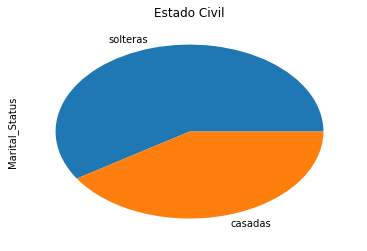

In [60]:
m = test_X['Marital_Status'].value_counts()
m.index = ['solteras', 'casadas']
m.plot(kind='pie', title='Estado Civil')

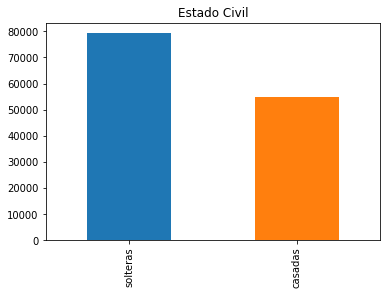

In [61]:
m = test_X['Marital_Status'].value_counts()
m.index = ['solteras', 'casadas']
m.plot(kind='bar', title='Estado Civil')

## Pregunta 5:

¿Nos comprarán más los hombres o las mujeres?


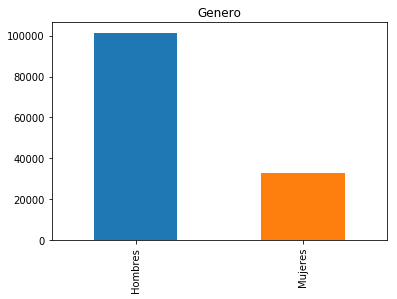

In [62]:
g = test_X['Gender'].value_counts()
g.index = ['Hombres', 'Mujeres']
g.plot(kind='bar', title='Genero')


## Pregunta 6

Clasifique por edades, que producto que se venderá más.

In [183]:
age = test_X['Age'].value_counts()
print(age.index)

Int64Index([2, 3, 1, 4, 5, 6, 0], dtype='int64')


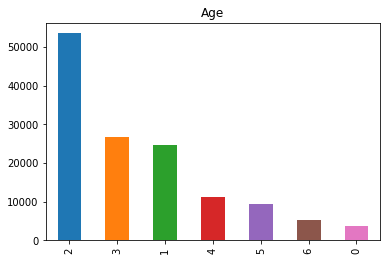

In [249]:
age = test_X['Age'].value_counts().plot(kind='bar', title='Age')

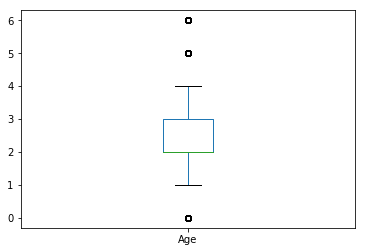

In [255]:
test_X['Age'].plot.box()

In [ ]:
h = test_X.groupby('Age')['Product_ID'].apply(lambda x: x.count())